In [107]:
import os
os.chdir("C:/Users/hp/Documents")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [108]:
data1= pd.read_csv("AdSmart.csv", na_values=['?', None])

In [109]:
data1

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [110]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


## Data Cleaning

###### Let's check users that have been replied multiple times in the data frame

In [111]:
session_counts = data1['auction_id'].value_counts(ascending=False)
session_counts

f589fa4b-ab62-4442-b4c3-e015f547880a    1
8e4d7158-e741-4be7-82f1-15f44e44595a    1
a5df045b-4ef2-4e9f-b024-f4c43950d832    1
869d822d-7f0e-4f8d-965a-14db6213443d    1
b4aa24e0-73e1-4d56-9108-d43fdd920ce5    1
                                       ..
0008ef63-77a7-448b-bd1e-075f42c55e39    1
afe7a6c3-a80c-4362-a589-cdc6ed27654b    1
bb7e0b5a-13da-4c2f-adda-23589f433178    1
3710a997-2fd7-42fb-9feb-ae1b4fa8db48    1
01637c58-8b8b-43f2-90d7-acc5d6563590    1
Name: auction_id, Length: 8077, dtype: int64

In [112]:
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 0 users that appear multiple times in the dataset


In [113]:
users_to_drop = session_counts[session_counts > 1].index

data1 = data1[~data1['auction_id'].isin(users_to_drop)]
print(f'The updated dataset now has {data1.shape[0]} entries')

The updated dataset now has 8077 entries


In [114]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [115]:
missing_values_table(data1)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


#### Online users belong to the control and exposed groups

In [116]:
data1['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [117]:
control = data1[data1['experiment'] == 'control']

In [118]:
control

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [119]:
treatment_sample = data1[data1['experiment'] == 'exposed']

In [120]:
treatment_sample

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [121]:
data1['device_make'].value_counts()

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
TA-1024                  1
Samsung SM-N960U1        1
Asus I01WD               1
EML-L29                  1
K7                       1
Name: device_make, Length: 270, dtype: int64

##### Let's check how many time the same date appear in the dataframe

In [122]:
session_counts1 = data1['date'].value_counts(ascending=False)
session_counts1

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

In [123]:
data1["yes"].value_counts()

0    7505
1     572
Name: yes, dtype: int64

###### Then we have  572 peoples in the dataframe who said yes . 





In [124]:
data1["no"].value_counts()

0    7406
1     671
Name: no, dtype: int64

##### Then we have 671 peoples in the dataframe who said no .

In [125]:
# To make sure all the control group are seeing Questionnaire 

pd.crosstab(data1['experiment'], data1['yes'])

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [126]:
pd.crosstab(data1['experiment'], data1['no'])

no,0,1
experiment,,
control,3749,322
exposed,3657,349


###  Let's compute the dataframe which contains only those who said yes and those who said no, we are not interested about those who didn't take a part of the questionnaire.

In [127]:
sample1 = data1[data1['yes'] == 1]

In [128]:
sample1.shape

(572, 9)

In [129]:
sample1.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [130]:
sample2 = data1[data1['no'] == 1]

In [131]:
#result = sample1.append(sample2)

In [132]:
compl_1 = pd.concat([sample1, sample2], axis=0)
#compl_1.reset_index(drop=True, inplace=True)

In [133]:
compl_1


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,1
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [134]:
#from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [135]:
sample2['brand_Lux'] = np.where(sample2['no'] == 1, 2, 0)
sample2.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,brand_Lux
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,2
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,2
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,2
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1,2
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1,2


In [136]:
sample1['brand_Lux'] = np.where(sample1['yes'] == 1, 1, 0)
sample1.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,brand_Lux
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0,1


In [137]:
result = sample1.append(sample2)

In [138]:
result

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,brand_Lux
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,1,2
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1,2
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,2
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,2


In [139]:
result['brand_Lux'] = np.where(result['brand_Lux'] == 2, 0, 1)

In [140]:
result

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,brand_Lux
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,1,0
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,0


# Graphical analysis

In [141]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

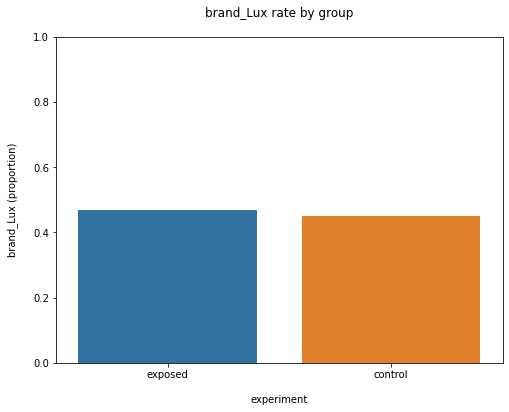

In [142]:
plt.figure(figsize=(8,6))

sns.barplot(x=result['experiment'], y=result['brand_Lux'], ci=False)

plt.ylim(0,1)
plt.title('brand_Lux rate by group', pad=20)
plt.xlabel('experiment', labelpad=15)
plt.ylabel('brand_Lux (proportion)', labelpad=15);

Here we notice that,both of the exposed  group and control group have pratically the same proportion which is  above 40 percent  and
under 60 percent. They are very closed to 50 percent.\
It seem like exposed group is little bit higher than  control. This difference is it significative.

In [143]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

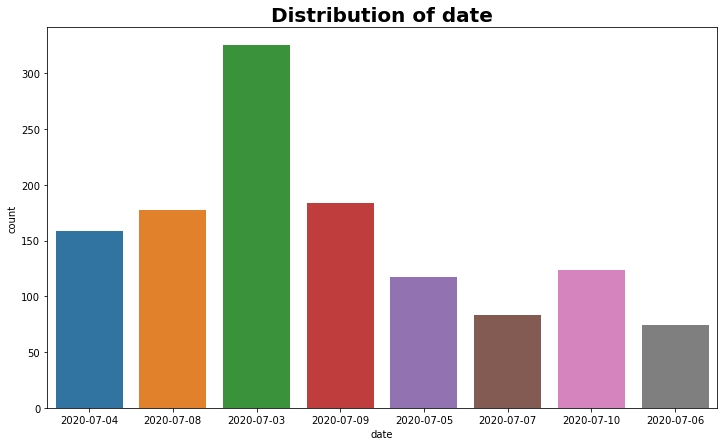

In [144]:
plot_count(result,'date')

The plot above show us  the distribution of the variable date,  and we notice that ,  the  most date, people apply \
for the questionnaire and respond
 is the  2020-07-03

In [145]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
    

In [146]:
data1_clean1 = result.drop(['auction_id','experiment', 'date', 'device_make','browser','yes','no','brand_Lux'], axis=1)



data_scal = (data1_clean1-data1_clean1.min())/(data1_clean1.max()-data1_clean1.min())

In [147]:
# apply normalization techniques
for column in data_scal.columns:
    data_scal[column] = (data_scal[column] -
                           data_scal[column].mean()) / data_scal[column].std()

In [149]:
data_scal

,hour,platform_os
16,0.776919,0.117708
23,-1.304353,0.117708
45,0.603480,0.117708
65,0.256601,0.117708
89,-0.957475,0.117708
...,...,...
8016,0.950358,0.117708
8058,1.123798,0.117708
8064,-0.784035,0.117708
8069,0.776919,0.117708


<Figure size 648x504 with 0 Axes>

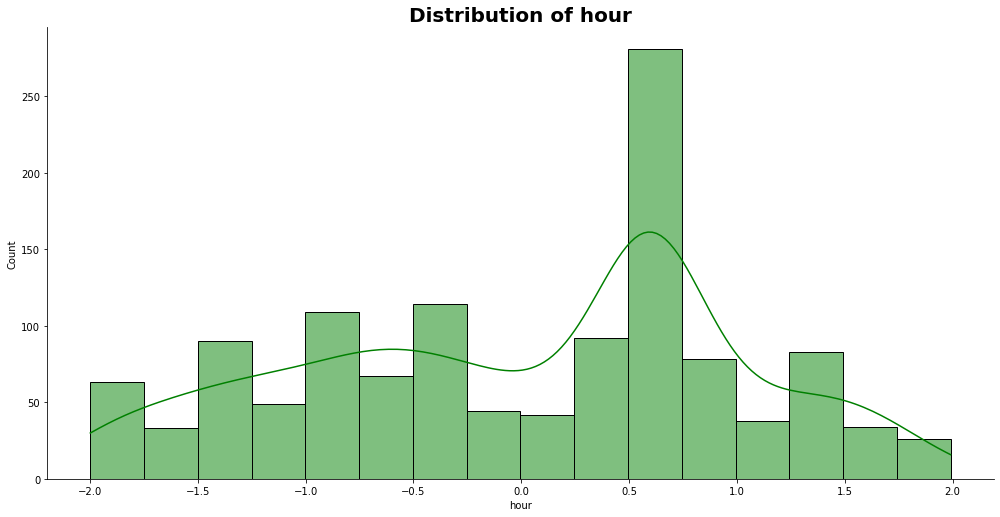

In [150]:
plot_hist(data_scal,'hour','green')

Here, we can say that ,  the distribution of hour is left skewed

<Figure size 648x504 with 0 Axes>

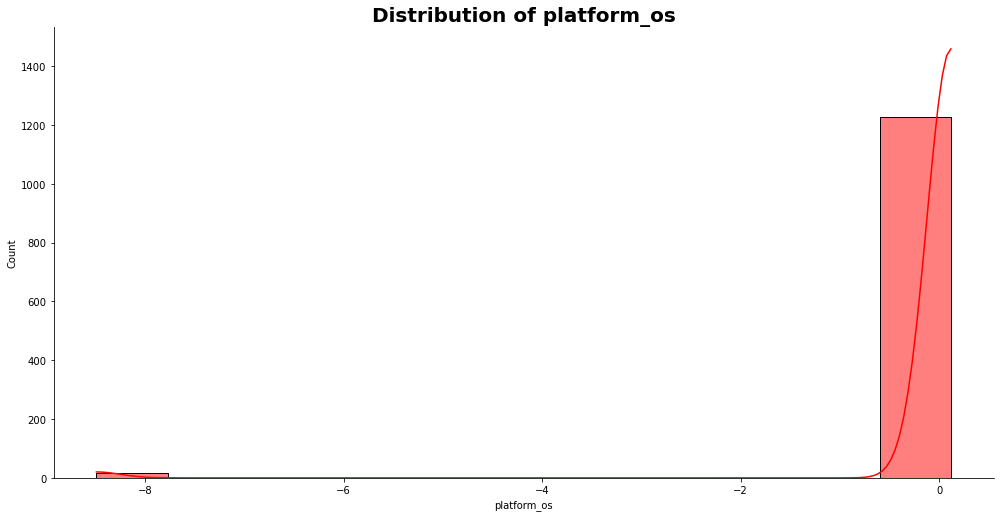

In [151]:
plot_hist(data_scal,'platform_os','red')

In [152]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


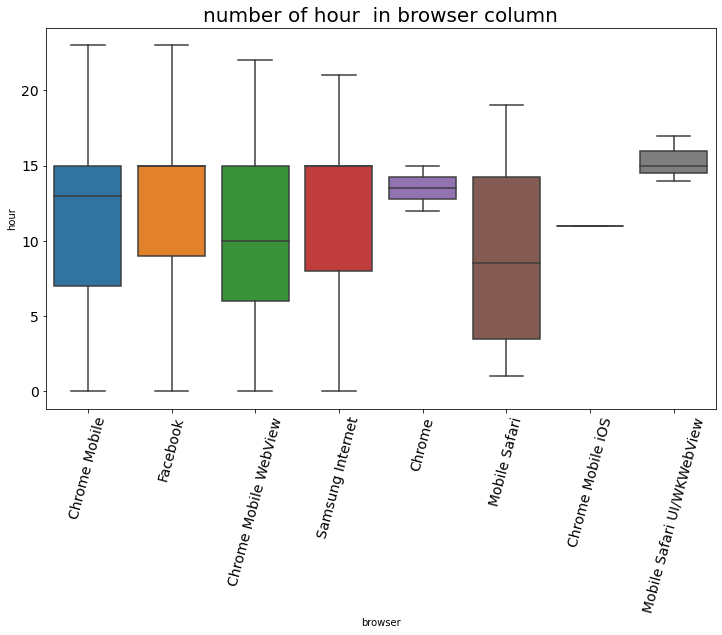

In [153]:
plot_box_multi(result, x_col='browser', y_col='hour', title='number of hour  in browser column')

Here we can see that, people like more  spent time on Chrome Mobile and Facebook  than other browsers

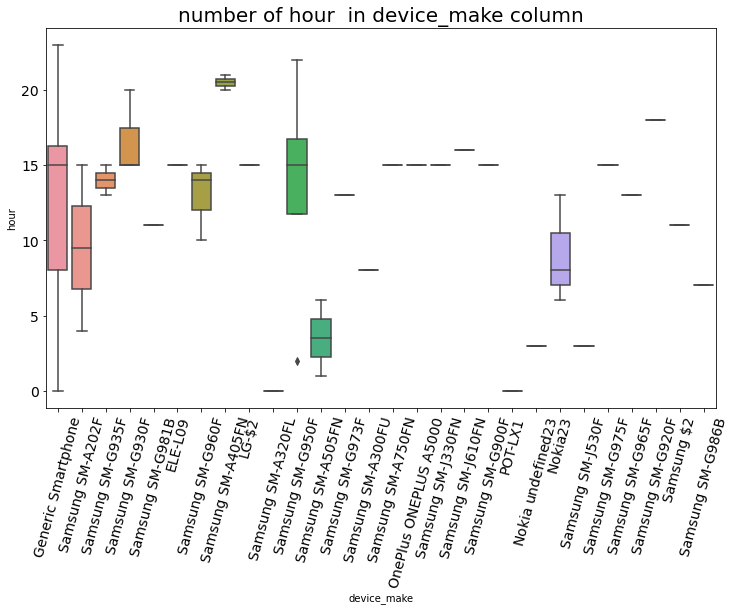

In [154]:

plot_box_multi(result.head(100), x_col='device_make', y_col='hour', title='number of hour  in device_make column')

 The plot showed us number of hour  in device_make column, and we noticed that Generic Smartphone  is the more  used as device_make, because people spent more time using it

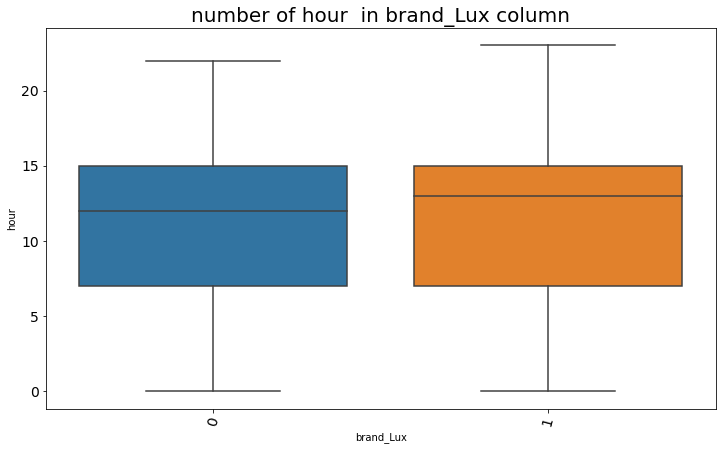

In [155]:
plot_box_multi(result, x_col='brand_Lux', y_col='hour', title='number of hour  in brand_Lux column')

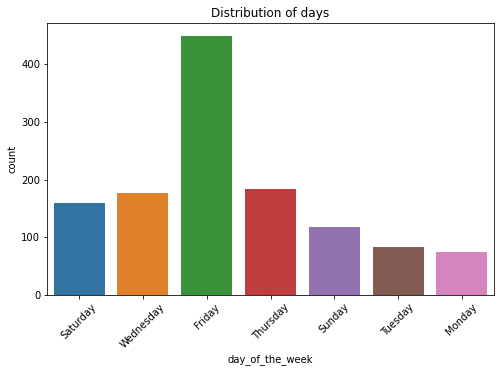

In [177]:
result['date']=pd.to_datetime(result.date)
result['day_of_the_week']=result['date'].dt.day_name()
#distribution of day of the week
plt.figure(figsize=(8,5))
sns.countplot(x='day_of_the_week',data=result)
plt.title('Distribution of days')
plt.xticks(rotation=45)
plt.show()

The most responses have been recorded on a Friday while the least is on a Tuesday

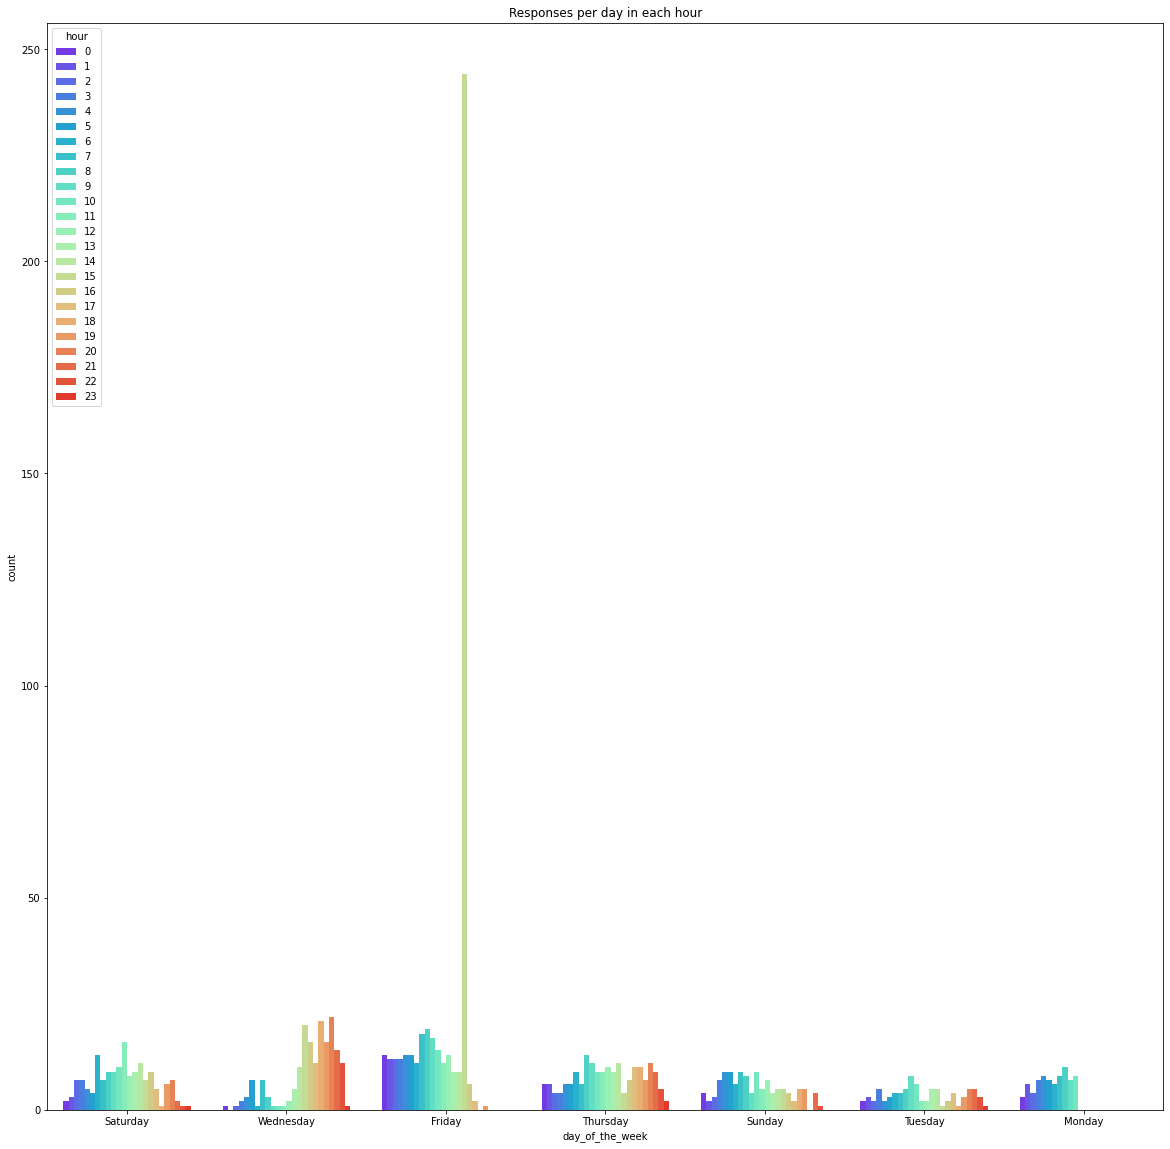

In [175]:
result['date']=pd.to_datetime(result.date)
result['day_of_the_week']=result['date'].dt.day_name()

plt.figure(figsize=(20,20))
sns.countplot(x='day_of_the_week',hue='hour',data=result,palette='rainbow')

plt.title('Responses per day in each hour')
plt.show()

Responses on Friday at hour 15 are the most while on Monday there are few to no responses past hour 10

# Sampling

In [160]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import scipy.stats as stats
from math import ceil

### Sample Size

In [173]:
pd.crosstab(result['experiment'], result['brand_Lux'])

brand_Lux,0,1
experiment,,
control,322,264
exposed,349,308


In [166]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.15, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

504


The require number in our case is 504 which is a little bit small, base on the datframe we get, that's  also a goo sample size.
and the number of data points the experiment is enough to make a reasonable judgement, because we optimize the size to be close to the population size in order to not miss any variable.

In [168]:


control_sample = result[result['experiment'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = result[result['experiment'] == 'exposed'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

# Sequential A/B testing algorithm

In [92]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [169]:
control_results = ab_test[ab_test['experiment'] == 'control']['brand_Lux']
treatment_results = ab_test[ab_test['experiment'] == 'exposed']['brand_Lux']

## Hypothesis : 

#### Null Hypothesis  :  there is no difference in brand awareness between the exposed and control groups in the current case
#### Alternative  : difference in brand awareness between the exposed and control groups in the current case are significant

In [170]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.76
p-value: 0.449
ci 95% for control group: [0.425, 0.512]
ci 95% for treatment group: [0.448, 0.536]


Since our $p$-value=0.732 is way above our $\alpha$=0.05, we cannot reject the null hypothesis $H_0$, which means that,  there is no difference in brand awareness between the exposed and control groups in the current case.
Which also means that it is more likely that the brand awareness of the new design is similar to our baseline. This is further proof that our new design is not likely to be an improvement on our old design, and that unfortunately we are back.